<a href="https://colab.research.google.com/github/Cairo-Henrique/Fundamentos-da-Programacao-de-Computadores-USP/blob/main/FPC_Lista_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Questão 1


In [ ]:
import numpy as np

def termo_fibonacci(N): # Retorna o enésimo termo da sequência de Fibonacci
  if N > 1:
    return termo_fibonacci(N-1) + termo_fibonacci(N-2) # Para N maiores que o termo 0 e o termo 1, retorna a soma dos 2 anteriores
  else:
    return N # Para N = 0,1 retorna 0,1

def sequencia_fibonacci(N): # Itera sobre a função termo_fibonacci para produzir uma array com a sequência
  return np.array([termo_fibonacci(i) for i in range(N)])

N = 10 # Número de termos
sequencia_fibonacci(N)

array([ 0,  1,  1,  2,  3,  5,  8, 13, 21, 34])

Questão 2

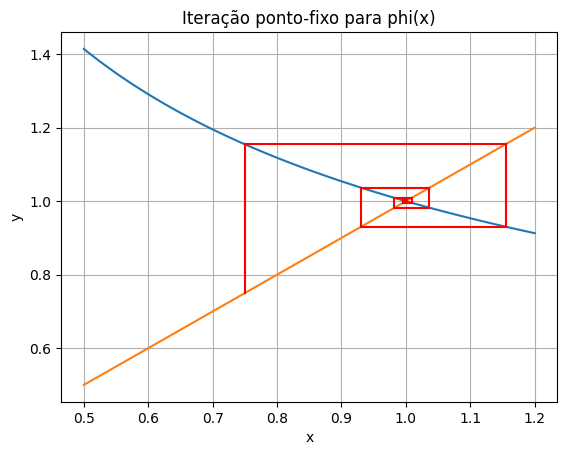

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def phi(x): # função phi
  return 1/np.sqrt(x)

def iteracao_ponto_fixo(phi, x_0, N): # Retorna uma array com os valores de x da sequência
  x = np.zeros(N)
  x[0] = x_0
  for i in range(1, N):
    x[i] = phi(x[i-1]) # Matematicamente recursivo
  return x

x_0 = 0.75
N = 100
x = iteracao_ponto_fixo(phi, x_0, N)

# Gráfico
plt.figure()
eixo_horizontal = np.linspace(0.5, 1.2, 100)
plt.plot(eixo_horizontal, phi(eixo_horizontal)) # y = phi(x)
plt.plot(eixo_horizontal, eixo_horizontal) # y = x

for i in range(N-1):
    # Linha vertical: (x[i], phi(x[i])) sobe até a curva y = phi(x)
    plt.plot([x[i], x[i]], [x[i], x[i+1]], 'r')
    # Linha horizontal: (phi(x[i]), phi(x[i])) vai até a reta y = x
    plt.plot([x[i], x[i+1]], [x[i+1], x[i+1]], 'r')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Iteração ponto-fixo para phi(x)")
plt.grid(True)
plt.show()

Questão 3

Solução exata: [0.9 0.7]
Solução Jacobi com 4 iteracoes: [0.89351852 0.6875    ]
Solução Jacobi com 7 iteracoes: [0.89930556 0.69945988]
Solução Jacobi com 9 iteracoes: [0.89988426 0.69990998]
Solução Jacobi com 12 iteracoes: [0.899995   0.69999035]
Solução Jacobi com 14 iteracoes: [0.89999917 0.69999839]
Solução Jacobi com 17 iteracoes: [0.89999991 0.69999993]
Solução Jacobi com 20 iteracoes: [0.9        0.69999999]


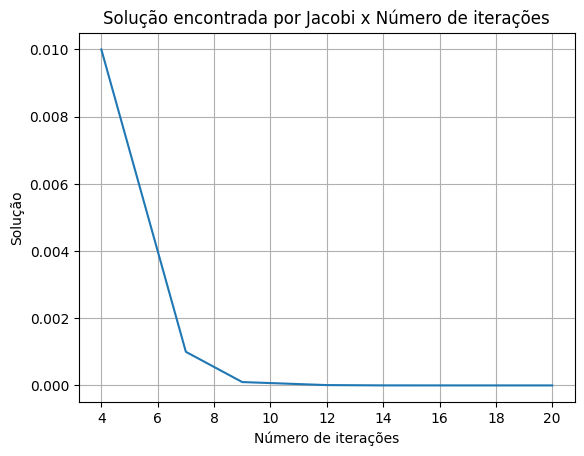

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def jacobi(chutes_iniciais, matriz, vetor, solucao, erro, max_iter=10**6):
  x = chutes_iniciais[0]
  y = chutes_iniciais[1]
  solucao_estimada = chutes_iniciais.copy()
  for iteracao in range(max_iter):
      nova_estimativa = solucao_estimada.copy()
      for i in range(len(vetor)):
          soma = 0
          for j in range(len(vetor)):
              if i != j:
                  soma += matriz[i, j] * solucao_estimada[j]
          nova_estimativa[i] = (vetor[i] - soma) / matriz[i, i]

      solucao_estimada = nova_estimativa.copy()
      x = solucao_estimada[0]
      y = solucao_estimada[1]
      if abs(x - solucao[0]) <= erro or abs(y - solucao[1]) <= erro:
        num_iteracoes = iteracao
        break
  if iteracao == max_iter - 1:
    print("Número máximo de iterações atingido.")
  return solucao_estimada, iteracao

# Parâmetros
matriz = np.array([[3, -1], [-2, 4]], dtype=float)
vetor = np.array([2, 1], dtype=float)
solucao = np.linalg.solve(matriz, vetor)
chutes_iniciais = np.array([0, 0], dtype=float)

print("Solução exata:", solucao)

erros = [10**(-i) for i in range(2, 9)]

array_num_iteracoes = np.array([])

for erro in erros:
  solucao_jacobi, num_iteracoes = jacobi(chutes_iniciais, matriz, vetor, solucao, erro)
  print(f"Solução Jacobi com {num_iteracoes} iteracoes:", solucao_jacobi)
  array_num_iteracoes = np.append(array_num_iteracoes, num_iteracoes)

# Gráfico
plt.figure()
plt.plot(array_num_iteracoes, erros)
plt.xlabel("Número de iterações")
plt.ylabel("Solução")
plt.title("Solução encontrada por Jacobi x Número de iterações")
plt.grid(True)
plt.show()

Questão 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def jacobi(chutes_iniciais, matriz, vetor, solucao, erro, max_iter=10**6):
  solucao_estimada = chutes_iniciais.copy()
  for iteracao in range(max_iter):
      nova_estimativa = solucao_estimada.copy()
      for i in range(len(vetor)):
          soma = 0
          for j in range(len(vetor)):
              if i != j:
                  soma += matriz[i, j] * solucao_estimada[j]
          nova_estimativa[i] = (vetor[i] - soma) / matriz[i, i]

      solucao_estimada = nova_estimativa.copy()

      if abs(solucao_estimada[0] - solucao[0]) <= erro or abs(solucao_estimada[1] - solucao[1]) <= erro or abs(solucao_estimada[2]) <= erro:
        break

  return solucao_estimada

# Parâmetros
matriz = np.array([[3, -1, -1], [-1, 3, -1], [-1, -1, 3]], dtype=float)
vetor = np.array([1, 2, 3], dtype=float)
solucao = np.linalg.solve(matriz, vetor)
chutes_iniciais = np.array([0 for i in range(len(vetor))], dtype=float)
erro = 10**(-2)

print("Solução exata:", solucao)

solucao_jacobi = jacobi(chutes_iniciais, matriz, vetor, solucao, erro)
print(f"Solução Jacobi", solucao_jacobi)

Solução exata: [1.75 2.   2.25]
Solução Jacobi [1.74314908 1.99314903 2.24314897]


Questão 5

In [ ]:
import numpy as np

# Matriz com coeficientes da equação que sempre tem solução
n = 3
R = np.random.rand(n,n)
matriz = R.T @ R
# Tornar diagonalmente dominante
for i in range(n):
    matriz[i, i] += np.sum(np.abs(matriz[i]))

# Vetor das igualdades
vetor = np.random.rand(n)

def jacobi(chutes_iniciais, matriz, vetor, erro, max_iter=10**6):
  solucao_estimada = chutes_iniciais.copy() # Vetor com os valores das variáveis
  for iteracao in range(max_iter):
      nova_estimativa = solucao_estimada.copy()
      for i in range(len(vetor)): # Fórmula de Jacobi
          soma = 0
          for j in range(len(vetor)):
              if i != j:
                  soma += matriz[i, j] * solucao_estimada[j]
          nova_estimativa[i] = (vetor[i] - soma) / matriz[i, i]

      if np.linalg.norm(nova_estimativa - solucao_estimada) < erro: # Interromper quando o erro for pequeno
        break
      solucao_estimada = nova_estimativa.copy()

  if iteracao == max_iter - 1:
    print("Número máximo de iterações atingido.")
  return solucao_estimada

# Solução
solucao = np.linalg.solve(matriz, vetor)
print("Solução exata:", solucao)

# Parâmetros
chutes_iniciais = np.array([0 for i in range(len(vetor))], dtype=float) # Chuta 0 em todas as variáveis
erro = 10**(-4)

solucao_jacobi = jacobi(chutes_iniciais, matriz, vetor, erro)
print(f"Solução Jacobi", solucao_jacobi)

Solução exata: [-0.00820197  0.19251379  0.09407127]
Solução Jacobi [-0.00817886  0.19253739  0.09409361]


Questão 5 - vetorizada

In [ ]:
import numpy as np

# Matriz com coeficientes da equação que sempre tem solução
n = 30
R = np.random.rand(n,n)
matriz = R.T @ R
# Tornar diagonalmente dominante
for i in range(n):
    matriz[i, i] += np.sum(np.abs(matriz[i]))

# Vetor das igualdades
vetor = np.random.rand(n)

def jacobi(chutes_iniciais, matriz, vetor, erro, max_iter=10**6):
  solucao_estimada = chutes_iniciais.copy() # Vetor com os valores das variáveis
  D = np.diag(np.diag(matriz))
  inv_D = np.linalg.inv(D)
  R = matriz - D
  b = vetor
  nova_estimativa = solucao_estimada.copy()
  for iteracao in range(max_iter):
      nova_estimativa = inv_D @ (b - R @ solucao_estimada)
      if np.linalg.norm(nova_estimativa - solucao_estimada) < erro: # Interromper quando o erro for pequeno
        break
      solucao_estimada = nova_estimativa.copy()

  if iteracao == max_iter - 1:
    print("Número máximo de iterações atingido.")
  return solucao_estimada

# Solução
solucao = np.linalg.solve(matriz, vetor)
print("Solução exata:", solucao)

# Parâmetros
chutes_iniciais = np.array([0 for i in range(len(vetor))], dtype=float) # Chuta 0 em todas as variáveis
erro = 10**(-4)

solucao_jacobi = jacobi(chutes_iniciais, matriz, vetor, erro)
print(f"Solução Jacobi", solucao_jacobi)

Solução exata: [-6.70843195e-04  1.99029168e-03  2.97008007e-03  4.03187857e-05
 -7.21372568e-04  2.31890170e-03 -2.05182255e-04  2.89715703e-03
  7.62924079e-04 -1.69662315e-04  2.41601466e-03  2.60855161e-04
 -9.09558003e-04 -9.18641026e-04 -8.20052099e-04  2.42468755e-03
  2.94939674e-03  1.20477628e-03  3.10583672e-03  1.01301422e-03
 -6.20776796e-04  1.60357942e-03  6.43692591e-04  2.82778916e-03
 -2.13398464e-04  2.87529386e-03  1.98139666e-05  6.88525373e-04
  7.90836362e-04  2.60092351e-03]
Solução Jacobi [-6.61862624e-04  1.99922703e-03  2.97905791e-03  4.92783649e-05
 -7.12363754e-04  2.32786309e-03 -1.96271176e-04  2.90627880e-03
  7.71952121e-04 -1.60696372e-04  2.42498805e-03  2.69834593e-04
 -9.00490612e-04 -9.09623745e-04 -8.11082700e-04  2.43362759e-03
  2.95839204e-03  1.21384243e-03  3.11490518e-03  1.02198785e-03
 -6.11774434e-04  1.61255467e-03  6.52760210e-04  2.83680096e-03
 -2.04310148e-04  2.88428102e-03  2.87477978e-05  6.97537896e-04
  7.99703591e-04  2.609827

Questão 6

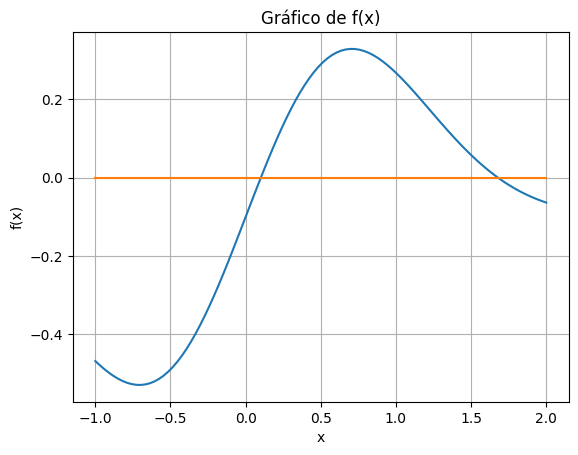

Chutando raíz x_0 = 0.0
Solução encontrada em 3 iterações: 0.10102584831568519
Chutando raíz x_0 = 1.5
Solução encontrada em 4 iterações: 1.67963061042845


In [ ]:
import numpy as np

def f(x): # função
    return x*np.exp(-(x**2)) - 0.1

def df(x): # derivada analítica da função
    return (1-2*x**2) / (np.exp(x**2))

def newton(x_0, erro, max_iter=10**6):
    x = x_0
    for iteracao in range(max_iter):
        x = x - f(x) / df(x)
        if abs(f(x)) < erro: # Interromper quando o erro for pequeno
            break
    return x, iteracao

# Gráfico
plt.figure()
eixo_horizontal = np.linspace(-1, 2, 100)
plt.plot(eixo_horizontal, f(eixo_horizontal))
plt.plot(eixo_horizontal, np.zeros(len(eixo_horizontal)))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfico de f(x)")
plt.grid(True)
plt.show()

erro = 10**(-15)
for x_0 in [0.0, 1.5]: # Chutes da raíz
  x, num_iteracoes = newton(x_0, erro)
  print("Chutando raíz x_0 =", x_0)
  print(f"Solução encontrada em {num_iteracoes} iterações:", x)

Questão 7 - parte 1

In [ ]:
import numpy as np

def potencias(A, x_0, num_iteracoes):
  x = x_0
  for _ in range(num_iteracoes):
    y = A @ x
    x = y / np.linalg.norm(y)
    lambida = x.T @ A @ x
  return x, lambida

# Parâmetros
n = 3
A = np.array([[1, 0, 0],
              [0, 2, 0],
              [0, 0, 3]])
x_0 = np.array([1, 1, 1])
x_0 = x_0 / np.linalg.norm(x_0)

num_iteracoes = 1000

x, lambida = potencias(A, x_0, num_iteracoes)
print("Autovetor:", x)
print("Autovalor:", lambida)

Autovetor: [0.00000000e+000 8.10477466e-177 1.00000000e+000]
Autovalor: 3.0


Questão 7 - parte 2

In [ ]:
import numpy as np

def potencias(A, x_0, num_iteracoes):
  x = x_0
  for _ in range(num_iteracoes):
    y = A @ x
    x = y / np.linalg.norm(y)
    lambida = x.T @ A @ x
  return x, lambida

# Parâmetros
n = 4
A = np.diag(np.random.rand(n)) # Cria matriz diagonal a partir de um vetor
x_0 = np.ones(n)
x_0 = x_0 / np.linalg.norm(x_0)
print("Matriz:\n", A)

num_iteracoes = 1000

x, lambida = potencias(A, x_0, num_iteracoes)
print("Autovetor:", x)
print("Autovalor:", lambida)

Matriz:
 [[0.06283084 0.         0.         0.        ]
 [0.         0.18841105 0.         0.        ]
 [0.         0.         0.46315601 0.        ]
 [0.         0.         0.         0.51435665]]
Autovetor: [0.00000000e+00 0.00000000e+00 2.90368878e-46 1.00000000e+00]
Autovalor: 0.514356645385743


Mini projeto: forma de equilibrio de uma corda elástica

In [ ]:
import numpy as np

def rho_i(x):
  return 1

def rho_ii(x):
  return 0.5 * (1 + np.exp(- 100 * ((x - 0.5)**2)))

# integral que retorna a massa total da corda
def massa_corda(rho, N, L):
    dx = L / N # diferencial dx
    xi = np.linspace(0, L, N) # pontos xi = i * dx
    array_rho = np.array([rho(x) for x in xi])
    SR = np.sum(array_rho * dx) # soma de Riemann
    return SR

L = 1 # 1 metro

for N in [10, 20, 40, 80]:
  print('N =', N)
  print(massa_corda(rho_i, N, L))
  print(massa_corda(rho_ii, N, L))
  print('')

N = 10
1.0
0.5797066083936101

N = 20
1.0000000000000002
0.5841915579180093

N = 40
1.0
0.5864071252316173

N = 80
0.9999999999999999
0.5875149088883942



In [ ]:
import numpy as np

def rho_i(x):
  return 1

def rho_ii(x):
  return 0.5 * (1 + np.exp(- 100 * ((x - 0.5)**2)))

# integral que retorna a massa i
def massa_i(i, rho, N, L, particoes=10**4):
    n = N - 1 # número de partículas
    l0 = L / N # comprimento de cada partícula
    inicio = (i + 1) * l0 - l0/2
    final = (i + 1) * l0 + l0/2
    dx = (final - inicio) / particoes # diferencial dx
    xi = np.linspace(inicio, final, particoes) # pontos xi = i * dx
    array_rho = np.array([rho(x) for x in xi])
    SR = np.sum(array_rho * dx) # soma de Riemann
    return SR

L = 1 # 1 metro

for N in [10, 20, 40, 80]:
  print('N =', N)
  for i in range(N):
    print(massa_i(i, rho_ii, N, L))
  print('')

N = 10
0.05000003292765329
0.0500180027026046
0.05148401394720227
0.0697456053429655
0.09612738177022395
0.06974560534296555
0.051484013947202326
0.050018002702604654
0.05000003292765332
0.050000000008715184

N = 20
0.025000000081192304
0.025000004957905046
0.025000185637293896
0.02500426828591131
0.025060358774592274
0.025525795049377048
0.027825840823535196
0.034382719599523014
0.044267828881476574
0.04948868836202432
0.044267828881476574
0.03438271959952299
0.02782584082353519
0.02552579504937704
0.025060358774592284
0.02500426828591134
0.025000185637293924
0.02500000495790508
0.025000000081192325
0.025000000000814173

N = 40
0.012500000002472799
0.012500000024428309
0.012500000213185428
0.012500001643581254
0.01250001119450539
0.012500067361059332
0.012500358107194163
0.012501682003169595
0.01250698006155294
0.01252559286684982
0.012582911331138152
0.012737329397875224
0.013100259000958247
0.01384147143911574
0.015149019610345458
0.017122261741209267
0.019626779862778304
0.02220967

[-0.02450002 -0.02450882 -0.02522717 -0.03417535 -0.04710242 -0.03417535
 -0.02522717 -0.02450882 -0.02450002 -0.0245    ]
[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2.]]
[ 0.         -0.14589102 -0.26730653 -0.364258   -0.43604804 -0.47373807
 -0.46441178 -0.42099212 -0.35242442 -0.2594105  -0.14194358  0.        ]
[-0.14589102 -0.26730653 -0.364258   -0.43604804 -0.47373807 -0.46441178
 -0.42099212 -0.35242442 -0.2594105  -0.14194358]


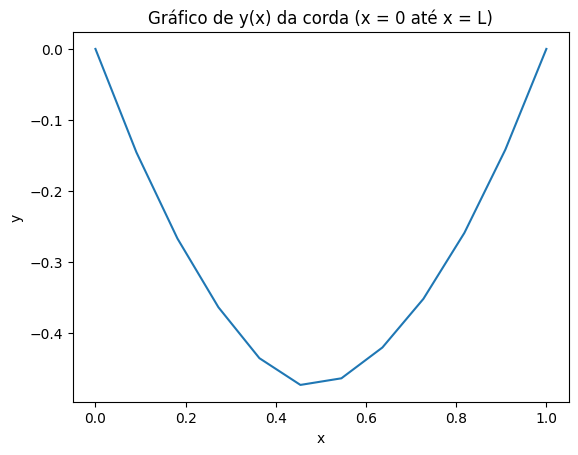

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def jacobi(chutes_iniciais, matriz, vetor, erro, max_iter=10**6):
  solucao_estimada = chutes_iniciais.copy() # Vetor com os valores das variáveis
  D = np.diag(np.diag(matriz)) # matriz diagonal
  inv_D = np.linalg.inv(D)
  R = matriz - D # matriz resto
  b = vetor
  nova_estimativa = solucao_estimada.copy()
  for iteracao in range(max_iter): # fórmula de Jacobi
      nova_estimativa = inv_D @ (b - R @ solucao_estimada)
      if np.linalg.norm(nova_estimativa - solucao_estimada) < erro: # Interromper quando o erro for pequeno
        break
      solucao_estimada = nova_estimativa.copy()

  if iteracao == max_iter - 1:
    print("Número máximo de iterações atingido.")
  return solucao_estimada

def forca_i(i):
  return 0

def vetor(N, L, T, g, forca_i):
  vetor = np.zeros(N) # Vetor de igualdade
  l0 = L / N # comprimento de cada partícula
  for i in range(N):
    vetor[i] = - (l0 / T) * (massa_i(i, rho_ii, N, L) * g - forca_i(i) )
  return vetor

def matriz(N, L, T):
  matriz = np.zeros((N, N))
  matriz[0, 0:2] = [2, -1]
  for i in range(1, N-1):
    matriz[i, i-1:i+2] = [-1, 2, -1]
  matriz[N-1, N-2:N] = [-1, 2]
  return matriz

# Parâmetros físicos
L = 1 # Comprimento da corda (m)
T = 2 # 2 Tração da corda (T)
N = 10 # número de partículas
g = 9.8 # aceleração da gravidade (m/s^2)

vetor = vetor(N, L, T, g, forca_i)
matriz = matriz(N, L, T)

print(vetor)
print(matriz)

# Parâmetros Jacobi
chutes_iniciais = np.array([0 for i in range(N)], dtype=float) # Chuta 0 em todas as variáveis
erro = 10**(-4)

y_array = jacobi(chutes_iniciais, matriz, vetor, erro) # Somente as n = N - 1 partículas interiores
y_array = np.append(0, y_array)
y_array = np.append(y_array, 0)
print(y_array)
x_array = np.linspace(0, L, N+2)
print(jacobi(chutes_iniciais, matriz, vetor, erro))
# Gráfico

plt.figure()
plt.plot(x_array, y_array)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico de y(x) da corda (x = 0 até x = L)")
plt.show()

[-0.00272222 -0.00272222 -0.00272222 -0.00272223 -0.00272227 -0.00272261
 -0.00272472 -0.00273508 -0.00277534 -0.00289862 -0.00319314 -0.00373282
 -0.00446579 -0.00514073 -0.00541944  0.04485927 -0.00446579 -0.00373282
 -0.00319314 -0.00289862 -0.00277534 -0.00273508 -0.00272472 -0.00272261
 -0.00272227 -0.00272223 -0.00272222 -0.00272222 -0.00272222 -0.00272222]
[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.

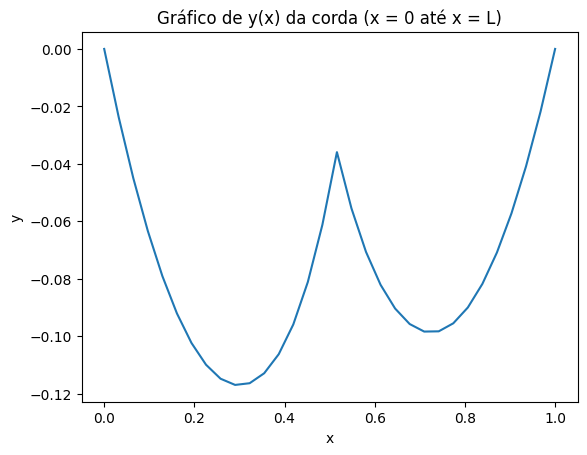

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_seidel(chutes_iniciais, matriz, vetor, erro, max_iter=10**6):
  solucao_estimada = chutes_iniciais.copy() # Vetor com os valores das variáveis
  D = np.diag(np.diag(matriz)) # matriz diagonal
  L = np.tril(matriz, k=-1) # matriz triangular estritamente inferior
  U = matriz - D - L # matriz triangular estritamente superior
  inv_DL = np.linalg.inv(D+L)
  b = vetor
  nova_estimativa = solucao_estimada.copy()
  for iteracao in range(max_iter): # fórmula Gauss-Seidel
      nova_estimativa = inv_DL @ (b - U @ solucao_estimada)
      if np.linalg.norm(nova_estimativa - solucao_estimada) < erro: # Interromper quando o erro for pequeno
        break
      solucao_estimada = nova_estimativa.copy()

  if iteracao == max_iter - 1:
    print("Número máximo de iterações atingido.")
  return solucao_estimada

def forca_i(i):
  if i == N/2:
    return 3
  else:
    return 0

def vetor(N, L, T, g, forca_i):
  vetor = np.zeros(N) # Vetor de igualdade
  l0 = L / N # comprimento de cada partícula
  for i in range(N):
    vetor[i] = - (l0 / T) * (massa_i(i, rho_ii, N, L) * g - forca_i(i) )
  return vetor

def matriz(N, L, T):
  matriz = np.zeros((N, N))
  matriz[0, 0:2] = [2, -1]
  for i in range(1, N-1):
    matriz[i, i-1:i+2] = [-1, 2, -1]
  matriz[N-1, N-2:N] = [-1, 2]
  return matriz

# Parâmetros físicos
L = 1 # Comprimento da corda (m)
T = 2 # 2 Tração da corda (T)
N = 30 # número de partículas
g = 9.8 # aceleração da gravidade (m/s^2)

vetor = vetor(N, L, T, g, forca_i)
matriz = matriz(N, L, T)

print(vetor)
print(matriz)

# Parâmetros Gauss-Seidel
chutes_iniciais = np.array([0 for i in range(N)], dtype=float) # Chuta 0 em todas as variáveis
erro = 10**(-4)

y_array = gauss_seidel(chutes_iniciais, matriz, vetor, erro) # Somente as n = N - 1 partículas interiores
y_array = np.append(0, y_array)
y_array = np.append(y_array, 0)
print(y_array)
x_array = np.linspace(0, L, N+2)

# Gráfico

plt.figure()
plt.plot(x_array, y_array)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico de y(x) da corda (x = 0 até x = L)")
plt.show()

[ -0.40112911  -1.80717451  -3.21320757  -4.61923176  -6.0252813
  -7.43131359  -8.83733864 -10.24337363 -11.64941462 -13.05544894]


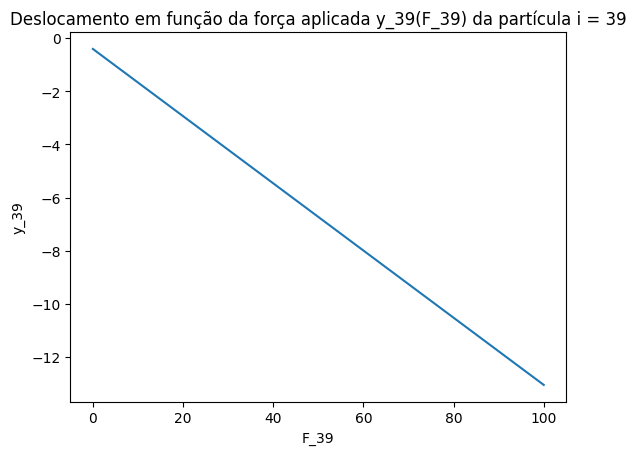

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_seidel(chutes_iniciais, matriz, vetor, erro, max_iter=10**6):
  solucao_estimada = chutes_iniciais.copy() # Vetor com os valores das variáveis
  D = np.diag(np.diag(matriz)) # matriz diagonal
  L = np.tril(matriz, k=-1) # matriz triangular estritamente inferior
  U = matriz - D - L # matriz triangular estritamente superior
  inv_DL = np.linalg.inv(D+L)
  b = vetor
  nova_estimativa = solucao_estimada.copy()
  for iteracao in range(max_iter): # fórmula Gauss-Seidel
      nova_estimativa = inv_DL @ (b - U @ solucao_estimada)
      if np.linalg.norm(nova_estimativa - solucao_estimada) < erro: # Interromper quando o erro for pequeno
        break
      solucao_estimada = nova_estimativa.copy()

  if iteracao == max_iter - 1:
    print("Número máximo de iterações atingido.")
  return solucao_estimada

def forca_i(i, modulo):
  if i == 39:
    return - modulo
  else:
    return 0

def calcular_vetor(N, L, T, g, forca_i, modulo):
  vetor = np.zeros(N) # Vetor de igualdade
  l0 = L / N # comprimento de cada partícula
  for i in range(N):
    vetor[i] = - (l0 / T) * (massa_i(i, rho_ii, N, L) * g - forca_i(i, modulo) )
  return vetor

def calcular_matriz(N, L, T):
  matriz = np.zeros((N, N))
  matriz[0, 0:2] = [2, -1]
  for i in range(1, N-1):
    matriz[i, i-1:i+2] = [-1, 2, -1]
  matriz[N-1, N-2:N] = [-1, 2]
  return matriz

def rho_i(x):
  return 1

# Parâmetros físicos
L = 1 # Comprimento da corda (m)
T = 2 # 2 Tração da corda (T)
N = 80 # número de partículas
g = 9.8 # aceleração da gravidade (m/s^2)

# Parâmetros Gauss-Seidel
chutes_iniciais = np.array([0 for i in range(N)], dtype=float) # Chuta 0 em todas as variáveis
erro = 10**(-4)

modulo_forca_39 = np.linspace(0, 100, 10)
y_39_array = np.array([])

for modulo in modulo_forca_39:

  vetor = calcular_vetor(N, L, T, g, forca_i, modulo)
  matriz = calcular_matriz(N, L, T)

  y_array = gauss_seidel(chutes_iniciais, matriz, vetor, erro) # Somente as n = N - 1 partículas interiores

  y_39 = y_array[39]

  y_39_array = np.append(y_39_array, y_39)

# Gráfico

print(y_39_array)
plt.figure()
plt.plot(modulo_forca_39, y_39_array)
plt.xlabel("F_39")
plt.ylabel("y_39")
plt.title("Deslocamento em função da força aplicada y_39(F_39) da partícula i = 39")
plt.show()

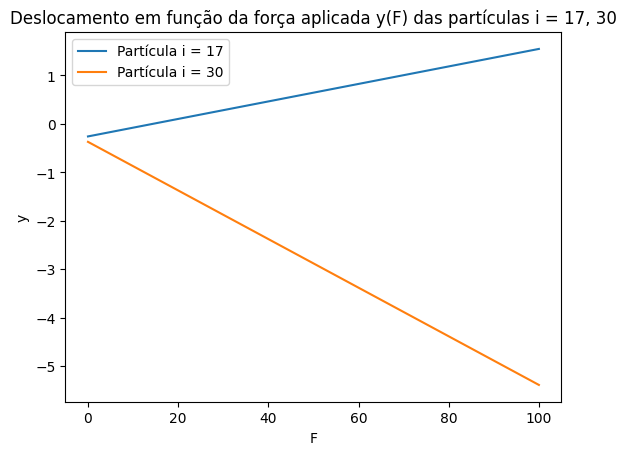

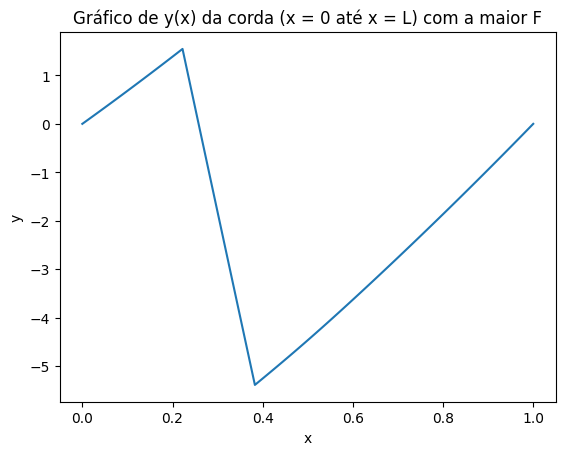

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_seidel(chutes_iniciais, matriz, vetor, erro, max_iter=10**6):
  solucao_estimada = chutes_iniciais.copy() # Vetor com os valores das variáveis
  D = np.diag(np.diag(matriz)) # matriz diagonal
  L = np.tril(matriz, k=-1) # matriz triangular estritamente inferior
  U = matriz - D - L # matriz triangular estritamente superior
  inv_DL = np.linalg.inv(D+L)
  b = vetor
  nova_estimativa = solucao_estimada.copy()
  for iteracao in range(max_iter): # fórmula Gauss-Seidel
      nova_estimativa = inv_DL @ (b - U @ solucao_estimada)
      if np.linalg.norm(nova_estimativa - solucao_estimada) < erro: # Interromper quando o erro for pequeno
        break
      solucao_estimada = nova_estimativa.copy()

  if iteracao == max_iter - 1:
    print("Número máximo de iterações atingido.")
  return solucao_estimada

def forca_i(i, modulo):
  if i == 17:
    return modulo
  elif i == 30:
    return - modulo
  else:
    return 0

def calcular_vetor(N, L, T, g, forca_i, modulo):
  vetor = np.zeros(N) # Vetor de igualdade
  l0 = L / N # comprimento de cada partícula
  for i in range(N):
    vetor[i] = - (l0 / T) * (massa_i(i, rho_ii, N, L) * g - forca_i(i, modulo) )
  return vetor

def calcular_matriz(N, L, T):
  matriz = np.zeros((N, N))
  matriz[0, 0:2] = [2, -1]
  for i in range(1, N-1):
    matriz[i, i-1:i+2] = [-1, 2, -1]
  matriz[N-1, N-2:N] = [-1, 2]
  return matriz

# Parâmetros físicos
L = 1 # Comprimento da corda (m)
T = 2 # 2 Tração da corda (T)
N = 80 # número de partículas
g = 9.8 # aceleração da gravidade (m/s^2)

# Parâmetros Gauss-Seidel
chutes_iniciais = np.array([0 for i in range(N)], dtype=float) # Chuta 0 em todas as variáveis
erro = 10**(-4)

modulo_forca = np.linspace(0, 100, 10)
y_17_array = np.array([])
y_30_array = np.array([])

for modulo in modulo_forca:

  vetor = calcular_vetor(N, L, T, g, forca_i, modulo)
  matriz = calcular_matriz(N, L, T)

  y_array = gauss_seidel(chutes_iniciais, matriz, vetor, erro) # Somente as n = N - 1 partículas interiores

  y_17 = y_array[17]
  y_30 = y_array[30]

  y_17_array = np.append(y_17_array, y_17)
  y_30_array = np.append(y_30_array, y_30)

# Gráfico dos deslocamentos das duas partículas

plt.figure()
plt.plot(modulo_forca, y_17_array, label="Partícula i = 17")
plt.plot(modulo_forca, y_30_array, label="Partícula i = 30")
plt.legend()
plt.xlabel("F")
plt.ylabel("y")
plt.title("Deslocamento em função da força aplicada y(F) das partículas i = 17, 30")
plt.show()

# Gráfico da corda

y_array = np.append(0, y_array) # Usa o último y_array do loop acima
y_array = np.append(y_array, 0)
x_array = np.linspace(0, L, N+2)

plt.figure()
plt.plot(x_array, y_array)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico de y(x) da corda (x = 0 até x = L) com a maior F")
plt.show()

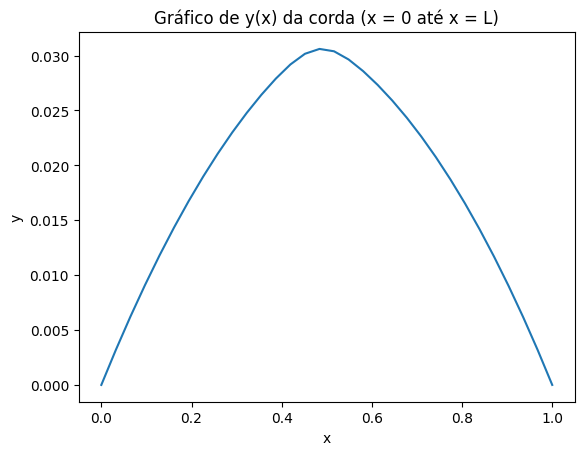

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_seidel(chutes_iniciais, matriz, vetor, erro, max_iter=10**6):
  solucao_estimada = chutes_iniciais.copy() # Vetor com os valores das variáveis
  D = np.diag(np.diag(matriz)) # matriz diagonal
  L = np.tril(matriz, k=-1) # matriz triangular estritamente inferior
  U = matriz - D - L # matriz triangular estritamente superior
  inv_DL = np.linalg.inv(D+L)
  b = vetor
  nova_estimativa = solucao_estimada.copy()
  for iteracao in range(max_iter): # fórmula Gauss-Seidel
      nova_estimativa = inv_DL @ (b - U @ solucao_estimada)
      if np.linalg.norm(nova_estimativa - solucao_estimada) < erro: # Interromper quando o erro for pequeno
        break
      solucao_estimada = nova_estimativa.copy()

  if iteracao == max_iter - 1:
    print("Número máximo de iterações atingido.")
  return solucao_estimada

def vetor(N, L, T, g, forca_i):
  vetor = np.zeros(N) # Vetor de igualdade
  l0 = L / N # comprimento de cada partícula
  for i in range(N):
    x = (i+1) * l0
    vetor[i] = - (l0**2 / T) * (rho_volumetrica - rho_f) * g * area_transversal(x) # atualizado para ser mais preciso com as densidades
  return vetor

def matriz(N, L, T):
  matriz = np.zeros((N, N))
  matriz[0, 0:2] = [2, -1]
  for i in range(1, N-1):
    matriz[i, i-1:i+2] = [-1, 2, -1]
  matriz[N-1, N-2:N] = [-1, 2]
  return matriz

def phi(x): # Diâmetro da corda
  return 2 * (1 + np.exp(- 200 * ((x - 0.5)**2))) / 100

def area_transversal(x):
  return np.pi * phi(x)**2 / 4

def volume_i(i, L, N): # Volume aproximado assumindo a área transversal do centro do elemento de massa
  l0 = L / N
  x = (i+1) * l0
  return area_transversal(x) * l0

def forca_i(i):
  return rho_f * volume_i(i, L, N) * g

def rho(x):
  return rho_volumetrica * area_transversal(x)

# integral que retorna a massa i
def massa_i(i, rho, N, L, particoes=10**4):
    n = N - 1 # número de partículas
    l0 = L / N # comprimento de cada partícula
    inicio = (i + 1) * l0 - l0/2
    final = (i + 1) * l0 + l0/2
    dx = (final - inicio) / particoes # diferencial dx
    xi = np.linspace(inicio, final, particoes) # pontos xi = i * dx
    array_rho = np.array([rho(x) for x in xi])
    SR = np.sum(array_rho * dx) # soma de Riemann
    return SR

# Parâmetros físicos
L = 1 # Comprimento da corda (m)
T = 2 # 2 Tração da corda (T)
N = 30 # número de partículas
g = 9.8 # aceleração da gravidade (m/s^2)
rho_f = 1000 # densidade da água
rho_volumetrica = 900 # densidade volumétrica da corda

vetor = vetor(N, L, T, g, forca_i)
matriz = matriz(N, L, T)

# Parâmetros Gauss-Seidel
chutes_iniciais = np.array([0 for i in range(N)], dtype=float) # Chuta 0 em todas as variáveis
erro = 10**(-4)

y_array = gauss_seidel(chutes_iniciais, matriz, vetor, erro) # Somente as n = N - 1 partículas interiores
y_array = np.append(0, y_array)
y_array = np.append(y_array, 0)
x_array = np.linspace(0, L, N+2)

# Gráfico

plt.figure()
plt.plot(x_array, y_array)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico de y(x) da corda (x = 0 até x = L)")
plt.show()